In [171]:
%matplotlib inline

import itertools
from matplotlib import pyplot as plt
from sklearn import datasets
import numpy as np

In [312]:
# sckit_learn から irisデータの取得
iris = datasets.load_iris()

# データの取得
features = iris.data
feature_names = iris.feature_names
targets = iris.target
target_names=iris.target_names
labels = target_names[targets]

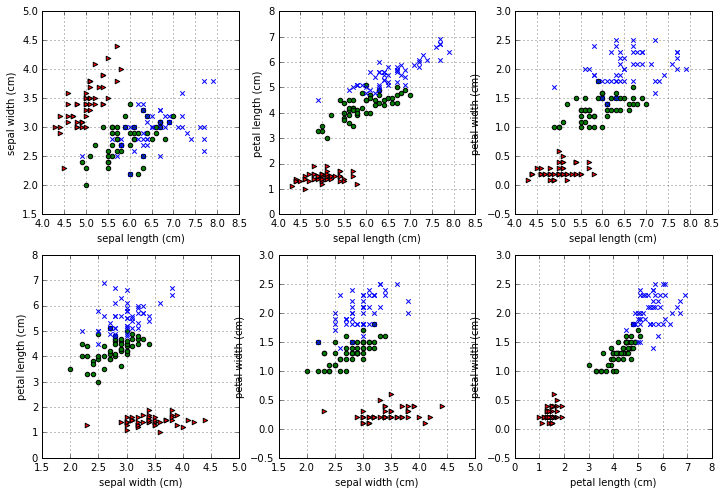

In [313]:
# グラフの表示
# 全体のサイズ調整
plt.figure(figsize=(12, 8))
for i, (x, y) in enumerate(itertools.combinations(range(4), 2)):
    plt.subplot(2, 3, i + 1)
    # 品種毎にマーカーの色や形を変える
    for t, marker, c in zip(range(3), '>ox', 'rgb'):
        plt.scatter(
            features[targets == t, x],
            features[targets == t, y],
            marker=marker,
            c=c,
        )
        plt.xlabel(feature_names[x])
        plt.ylabel(feature_names[y])
        plt.autoscale()
        plt.grid()

plt.show()

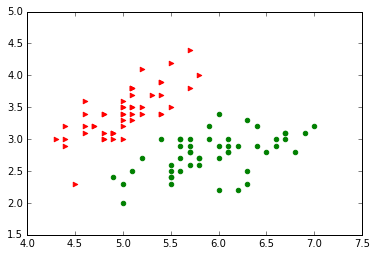

In [314]:
#  setosa, versicolor の `sepal_length`と`sepal_width`を用いる
setosa_sepal_length = features[labels == 'setosa', 0]
setosa_sepal_width = features[labels == 'setosa', 1]
setosa = np.c_[setosa_sepal_length, setosa_sepal_width]

versicolor_sepal_length = features[labels == 'versicolor', 0]
versicolor_sepal_width = features[labels == 'versicolor', 1]
versicolor = np.c_[versicolor_sepal_length, versicolor_sepal_width]

plt.scatter(setosa[:, 0], setosa[:, 1], marker='>',color='red')
plt.scatter(versicolor[:, 0], versicolor[:, 1],  marker='o', color='g')

In [315]:
f = np.r_[setosa, versicolor]
data = np.c_[f,np.ones(len(f))]
labels = np.r_[np.ones(len(setosa)),np.zeros(len(versicolor))]

In [330]:
def train(data, labels):
    # 初期値は適当に
    weight=np.array([1,-1,3])
    loop_cnt = 1000
    suit_cnt = 0
    rate = 0.01
    
    for loop in range(loop_cnt):
        suit_cnt=0
        for i in range(len(data)):
            weight, suit = _train(weight, data[i],labels[i],rate)
        
            if (suit):
                suit_cnt += 1
    
        # すべてのデータに対して、マッチすれば
        # 重みとループ数を返す．
        if (suit_cnt == len(data)):
            return [weight, loop]
        
    # 収束しない場合は、weightと -1 を返す．
    return [weight, -1]

def _train(w, data, label, rate):
    result = 1 if np.dot(w,data) > 0 else 0
    
    return [w + rate * (label - result) * data, label == result]

loop_cnt: 82


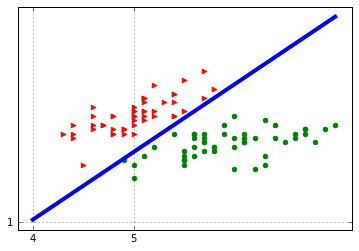

In [331]:
w, loop = train(data,labels)
if (loop<0):
    print("収束しませんでした。")
else:
    print("loop_cnt:",loop)

a = -(w[0]/w[1])
b = -(w[2]/w[1])

x = np.array(range(4, 8))
y = a * x + b
plt.plot(x, y, color='blue', linewidth=4)

plt.xticks(range(6))
plt.yticks(range(2))
plt.grid()

plt.scatter(setosa[:, 0], setosa[:, 1], marker='>',color='red')
plt.scatter(versicolor[:, 0], versicolor[:, 1], marker='o',color='green')
plt.show()